# Jupyter Notebook to compute performance metrics from the segmentation predictions.

## Imports

In [1]:
import os
import json
from shutil import copy

# Scientific modules import
import numpy as np
from skimage import io
from skimage.transform import rescale

import matplotlib.pyplot as plt
import tensorflow as tf

# AxonDeepSeg import modules
from AxonDeepSeg.apply_model import axon_segmentation
from AxonDeepSeg.testing.segmentation_scoring import Metrics_calculator
import AxonDeepSeg.ads_utils as ads
from config import axonmyelin_suffix

%matplotlib inline

/home/groups/bzuchero/miniconda/envs/ads_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/groups/bzuchero/miniconda/envs/ads_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/groups/bzuchero/miniconda/envs/ads_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/groups/

## Compute axon and myelin validation metrics on a test image

In [2]:
#Set model path
model_name = 'PNS_TEM_2021-12-01_01-23-00'
path_model = os.path.join('..','models',model_name)


# Load config file
file_config = 'config_network.json'
fname_config = os.path.join(path_model, file_config)

if os.path.exists(fname_config):
    with open(fname_config, 'r') as fd:
        config_network = json.loads(fd.read())

In [3]:
#Set test image path
path_img_dir = '/home/groups/bzuchero/axondeepseg/data/processed/Test/WT2_p17_1900x_0002/'
file_img = 'image.png'
path_img = path_img_dir + file_img
print(path_img)

#Get segmentation
tf.reset_default_graph()
prediction = axon_segmentation(path_img_dir, file_img, path_model, config_network, resampled_resolutions=0.01, verbosity_level=3)

# Original image
img = ads.imread(os.path.join(path_img_dir,'image.png'))

# Groundtruth image
mask = ads.imread(os.path.join(path_img_dir,'mask.png'))
mask = ads.imread(os.path.join(path_img_dir,'mask.png'))
gt_axon = mask > 200
gt_myelin = np.logical_and(mask >= 50, mask <= 200)

# Prediction image (output of AxonDeepSeg)
pred = ads.imread(os.path.join(path_img_dir,'image' + str(axonmyelin_suffix)))
pred_axon = pred > 200
pred_myelin = np.logical_and(pred >= 50, pred <= 200)

/home/groups/bzuchero/axondeepseg/data/processed/Test/WT2_p17_1900x_0002/image.png
Loading acquisitions ...
Rescaling acquisitions to the target resolution ...
Graph construction ...


2021-12-02 18:37:52.368491: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2021-12-02 18:37:52.373512: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2021-12-02 18:37:52.373797: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x56515a48a5f0 executing computations on platform Host. Devices:
2021-12-02 18:37:52.373917: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2021-12-02 18:37:52.554128: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x56515a4f7330 executing computations on platform CUDA. Devices:
2021-12-02 18:37:52.554153: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2021-12-02 18:37:52.554303: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found 

Beginning inference ...
processing patch 1 of 36
processing patch 2 of 36
processing patch 3 of 36
processing patch 4 of 36
processing patch 5 of 36
processing patch 6 of 36
processing patch 7 of 36
processing patch 8 of 36
processing patch 9 of 36
processing patch 10 of 36
processing patch 11 of 36
processing patch 12 of 36
processing patch 13 of 36
processing patch 14 of 36
processing patch 15 of 36
processing patch 16 of 36
processing patch 17 of 36
processing patch 18 of 36
processing patch 19 of 36
processing patch 20 of 36
processing patch 21 of 36
processing patch 22 of 36
processing patch 23 of 36
processing patch 24 of 36
processing patch 25 of 36
processing patch 26 of 36
processing patch 27 of 36
processing patch 28 of 36
processing patch 29 of 36
processing patch 30 of 36
processing patch 31 of 36
processing patch 32 of 36
processing patch 33 of 36
processing patch 34 of 36
processing patch 35 of 36
processing patch 36 of 36


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


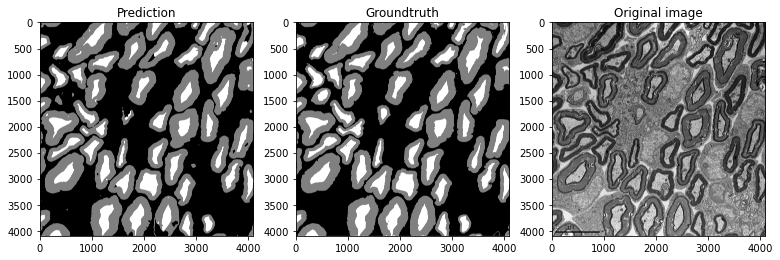

In [4]:
#Graph predicted output from model alongside the groundtruth and original images
fig, axes = plt.subplots(1,3, figsize=(13,10))
ax1, ax2, ax3 = axes[0], axes[1], axes[2]
ax1.set_title('Prediction')
ax1.imshow(pred,cmap='gray')
ax2.set_title('Groundtruth')
ax2.imshow(mask,cmap='gray')
ax3.set_title('Original image')
ax3.imshow(img, cmap = 'gray')
plt.show();

In [5]:
config_network

{'n_classes': 3,
 'thresholds': [0, 0.2, 0.8],
 'trainingset_patchsize': 512,
 'trainingset': 'TEM',
 'batch_size': 8,
 'epochs': 2000,
 'checkpoint_period': 5,
 'checkpoint': None,
 'depth': 4,
 'convolution_per_layer': [2, 2, 2, 2],
 'size_of_convolutions_per_layer': [[5, 5], [3, 3], [3, 3], [3, 3]],
 'features_per_convolution': [[[1, 16], [16, 16]],
  [[16, 32], [32, 32]],
  [[32, 64], [64, 64]],
  [[64, 128], [128, 128]]],
 'downsampling': 'convolution',
 'dropout': 0.75,
 'learning_rate': 0.001,
 'learning_rate_decay_activate': True,
 'learning_rate_decay_period': 24000,
 'learning_rate_decay_type': 'polynomial',
 'learning_rate_decay_rate': 0.9,
 'batch_norm_activate': True,
 'batch_norm_decay_decay_activate': True,
 'batch_norm_decay_starting_decay': 0.7,
 'batch_norm_decay_ending_decay': 0.9,
 'batch_norm_decay_decay_period': 16000,
 'weighted_cost-activate': True,
 'weighted_cost-balanced_activate': True,
 'weighted_cost-balanced_weights': [1.1, 1, 1.3],
 'weighted_cost-bounda

## Compute validation metrics for axon segmentation

In [6]:
# Create object to manage segmentation metrics for axon mask
axon_metrics = Metrics_calculator(pred_axon, gt_axon)

# Compute and display results (pixelwise metrics):
print('Pixelwise Sensitivity:', axon_metrics.pw_sensitivity())
print('Pixelwise Accuracy:',axon_metrics.pw_accuracy())
print('Pixelwise Dice:',axon_metrics.pw_dice())
print('Pixelwise F1 score:',axon_metrics.pw_F1_score())
print('Pixelwise False negative rate:',axon_metrics.pw_FN_rate())
print('Pixelwise False positive rate:',axon_metrics.pw_FP_rate())
print('Pixelwise Jaccard index:',axon_metrics.pw_jaccard())
print('Pixelwise Precision:',axon_metrics.pw_precision())
print('Pixelwise Specificity:',axon_metrics.pw_specificity())

axon_metrics_array = np.array([axon_metrics.pw_sensitivity(),axon_metrics.pw_specificity(),axon_metrics.pw_precision(),
     axon_metrics.pw_accuracy(), axon_metrics.pw_F1_score(), axon_metrics.pw_dice(), axon_metrics.pw_jaccard()])

# Compute and display results (elementwise metrics):
dice_output = axon_metrics.ew_dice('all')

print('Elementwise Dice:',axon_metrics.ew_dice('short'))

Pixelwise Sensitivity: 0.8481288289156542
Pixelwise Accuracy: 0.9753599166870117
Pixelwise Dice: 0.9031387495143957
Pixelwise F1 score: 0.9031387495143958
Pixelwise False negative rate: 0.15187117108434578
Pixelwise False positive rate: 0.0047079363488219395
Pixelwise Jaccard index: 0.8233846797984308
Pixelwise Precision: 0.9657795343695488
Pixelwise Specificity: 0.9952920636511781
Elementwise Dice: {'mean': 0.6738110890815165, 'std': 0.3681207412078386, 'min': 0.0005420086132238319, 'max': 0.96266038686669, 'percent_5': 0.003487822064241286, 'percent_10': 0.03209281993904535, 'percent_25': 0.4035154361938731, 'percent_50': 0.9104842105263158, 'percent_75': 0.9333732602974134, 'percent_90': 0.9454541773752088, 'percent_95': 0.9527354816646754}


## Compute validation metrics for myelin segmentation

In [7]:
# Create object to manage segmentation metrics for myelin mask
myelin_metrics = Metrics_calculator(pred_myelin, gt_myelin)

# Compute and display results (pixelwise metrics):
print('Pixelwise Sensitivity:', myelin_metrics.pw_sensitivity())
print('Pixelwise Accuracy:',myelin_metrics.pw_accuracy())
print('Pixelwise Dice:',myelin_metrics.pw_dice())
print('Pixelwise F1 score:',myelin_metrics.pw_F1_score())
print('Pixelwise False negative rate:',myelin_metrics.pw_FN_rate())
print('Pixelwise False positive rate:',myelin_metrics.pw_FP_rate())
print('Pixelwise Jaccard index:',myelin_metrics.pw_jaccard())
print('Pixelwise Precision:',myelin_metrics.pw_precision())
print('Pixelwise Specificity:',myelin_metrics.pw_specificity())

myelin_metrics_array = np.array([myelin_metrics.pw_sensitivity(),myelin_metrics.pw_specificity(),myelin_metrics.pw_precision(),
                        myelin_metrics.pw_accuracy(), myelin_metrics.pw_F1_score(), myelin_metrics.pw_dice(), 
                        myelin_metrics.pw_jaccard()])

Pixelwise Sensitivity: 0.9522063073848518
Pixelwise Accuracy: 0.9454730749130249
Pixelwise Dice: 0.9336932472079784
Pixelwise F1 score: 0.9336932472079784
Pixelwise False negative rate: 0.04779369261514821
Pixelwise False positive rate: 0.059075495519932186
Pixelwise Jaccard index: 0.8756328746518697
Pixelwise Precision: 0.9158863301422153
Pixelwise Specificity: 0.9409245044800678


## Visualization of pixelwise metrics for both axon and myelin

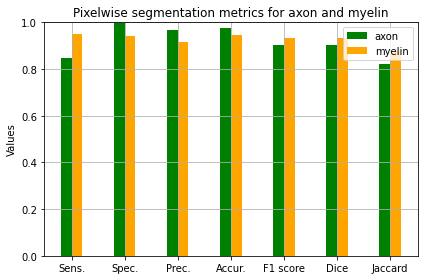

In [8]:
n_groups = 7
fig, ax = plt.subplots()
index = np.arange(n_groups)

ax.bar(index-0.1, axon_metrics_array, width=0.2, color='green',label='axon')
ax.bar(index+0.1, myelin_metrics_array, width=0.2, color='orange',label='myelin')

ax.set_ylabel('Values')
ax.set_title('Pixelwise segmentation metrics for axon and myelin')
ax.set_xticks(index)
ax.set_xticklabels(('Sens.', 'Spec.', 'Prec.', 'Accur.', 'F1 score','Dice','Jaccard'), minor=False, rotation=0)
ax.legend(loc='best')
ax.grid(True)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

## Visualization of elementwise Dice metric for axon objects

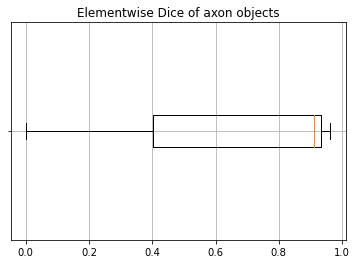

In [9]:
fig, ax = plt.subplots()
ax.boxplot(dice_output, 0, '',vert=False)
ax.set_title('Elementwise Dice of axon objects')
ax.grid(True)

# A way to remove the y labels
ax.set_yticklabels([]);


In [10]:
#Set test image path
path_img_dir = '/home/groups/bzuchero/axondeepseg/data/processed/Test/WT2_p45_1900x_0008'
file_img = 'image.png'
path_img = path_img_dir + file_img
print(path_img)

#Get segmentation
tf.reset_default_graph()
prediction = axon_segmentation(path_img_dir, file_img, path_model, config_network, resampled_resolutions=0.01, verbosity_level=3)

# Original image
img = ads.imread(os.path.join(path_img_dir,'image.png'))

# Groundtruth image
mask = ads.imread(os.path.join(path_img_dir,'mask.png'))
mask = ads.imread(os.path.join(path_img_dir,'mask.png'))
gt_axon = mask > 200
gt_myelin = np.logical_and(mask >= 50, mask <= 200)

# Prediction image (output of AxonDeepSeg)
pred = ads.imread(os.path.join(path_img_dir,'image' + str(axonmyelin_suffix)))
pred_axon = pred > 200
pred_myelin = np.logical_and(pred >= 50, pred <= 200)

/home/groups/bzuchero/axondeepseg/data/processed/Test/WT2_p45_1900x_0008image.png
Loading acquisitions ...
Rescaling acquisitions to the target resolution ...
Graph construction ...


2021-12-02 18:41:06.995059: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2021-12-02 18:41:06.995418: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-12-02 18:41:06.995498: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2021-12-02 18:41:06.995558: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2021-12-02 18:41:06.995706: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30593 MB memory) -> physical GPU (device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3e:00.0, compute capability: 7.0)


Beginning inference ...
processing patch 1 of 36
processing patch 2 of 36
processing patch 3 of 36
processing patch 4 of 36
processing patch 5 of 36
processing patch 6 of 36
processing patch 7 of 36
processing patch 8 of 36
processing patch 9 of 36
processing patch 10 of 36
processing patch 11 of 36
processing patch 12 of 36
processing patch 13 of 36
processing patch 14 of 36
processing patch 15 of 36
processing patch 16 of 36
processing patch 17 of 36
processing patch 18 of 36
processing patch 19 of 36
processing patch 20 of 36
processing patch 21 of 36
processing patch 22 of 36
processing patch 23 of 36
processing patch 24 of 36
processing patch 25 of 36
processing patch 26 of 36
processing patch 27 of 36
processing patch 28 of 36
processing patch 29 of 36
processing patch 30 of 36
processing patch 31 of 36
processing patch 32 of 36
processing patch 33 of 36
processing patch 34 of 36
processing patch 35 of 36
processing patch 36 of 36


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


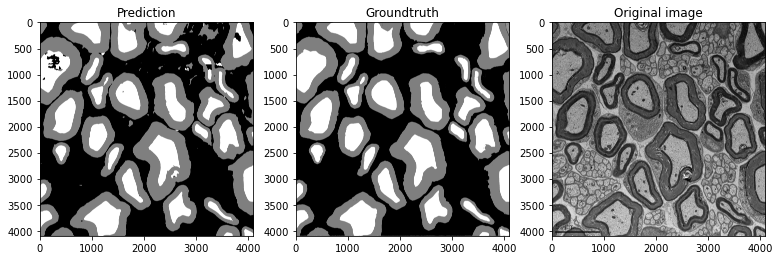

In [11]:
#Graph predicted output from model alongside the groundtruth and original images
fig, axes = plt.subplots(1,3, figsize=(13,10))
ax1, ax2, ax3 = axes[0], axes[1], axes[2]
ax1.set_title('Prediction')
ax1.imshow(pred,cmap='gray')
ax2.set_title('Groundtruth')
ax2.imshow(mask,cmap='gray')
ax3.set_title('Original image')
ax3.imshow(img, cmap = 'gray')
plt.show();

In [12]:
# Create object to manage segmentation metrics for axon mask
axon_metrics = Metrics_calculator(pred_axon, gt_axon)

# Compute and display results (pixelwise metrics):
print('Pixelwise Sensitivity:', axon_metrics.pw_sensitivity())
print('Pixelwise Accuracy:',axon_metrics.pw_accuracy())
print('Pixelwise Dice:',axon_metrics.pw_dice())
print('Pixelwise F1 score:',axon_metrics.pw_F1_score())
print('Pixelwise False negative rate:',axon_metrics.pw_FN_rate())
print('Pixelwise False positive rate:',axon_metrics.pw_FP_rate())
print('Pixelwise Jaccard index:',axon_metrics.pw_jaccard())
print('Pixelwise Precision:',axon_metrics.pw_precision())
print('Pixelwise Specificity:',axon_metrics.pw_specificity())

axon_metrics_array = np.array([axon_metrics.pw_sensitivity(),axon_metrics.pw_specificity(),axon_metrics.pw_precision(),
     axon_metrics.pw_accuracy(), axon_metrics.pw_F1_score(), axon_metrics.pw_dice(), axon_metrics.pw_jaccard()])

# Compute and display results (elementwise metrics):
dice_output = axon_metrics.ew_dice('all')

print('Elementwise Dice:',axon_metrics.ew_dice('short'))

Pixelwise Sensitivity: 0.8880857966937781
Pixelwise Accuracy: 0.9750159978866577
Pixelwise Dice: 0.9368973694415874
Pixelwise F1 score: 0.9368973694415875
Pixelwise False negative rate: 0.11191420330622193
Pixelwise False positive rate: 0.002036780634468993
Pixelwise Jaccard index: 0.8812859102318902
Pixelwise Precision: 0.9913866326656102
Pixelwise Specificity: 0.997963219365531
Elementwise Dice: {'mean': 0.7942364674279475, 'std': 0.30484697750160283, 'min': 0.0002504045598670352, 'max': 0.9719724571313969, 'percent_5': 0.0015996158730758737, 'percent_10': 0.17950780361940505, 'percent_25': 0.8634075968923722, 'percent_50': 0.9249608394042617, 'percent_75': 0.9531479554557925, 'percent_90': 0.9627327125581835, 'percent_95': 0.9662912220667227}


In [13]:
# Create object to manage segmentation metrics for myelin mask
myelin_metrics = Metrics_calculator(pred_myelin, gt_myelin)

# Compute and display results (pixelwise metrics):
print('Pixelwise Sensitivity:', myelin_metrics.pw_sensitivity())
print('Pixelwise Accuracy:',myelin_metrics.pw_accuracy())
print('Pixelwise Dice:',myelin_metrics.pw_dice())
print('Pixelwise F1 score:',myelin_metrics.pw_F1_score())
print('Pixelwise False negative rate:',myelin_metrics.pw_FN_rate())
print('Pixelwise False positive rate:',myelin_metrics.pw_FP_rate())
print('Pixelwise Jaccard index:',myelin_metrics.pw_jaccard())
print('Pixelwise Precision:',myelin_metrics.pw_precision())
print('Pixelwise Specificity:',myelin_metrics.pw_specificity())

myelin_metrics_array = np.array([myelin_metrics.pw_sensitivity(),myelin_metrics.pw_specificity(),myelin_metrics.pw_precision(),
                        myelin_metrics.pw_accuracy(), myelin_metrics.pw_F1_score(), myelin_metrics.pw_dice(), 
                        myelin_metrics.pw_jaccard()])

Pixelwise Sensitivity: 0.9881171780249053
Pixelwise Accuracy: 0.9389068484306335
Pixelwise Dice: 0.9194387222597618
Pixelwise F1 score: 0.9194387222597616
Pixelwise False negative rate: 0.011882821975094715
Pixelwise False positive rate: 0.08792065511656699
Pixelwise Jaccard index: 0.8508899413669258
Pixelwise Precision: 0.8596867422208073
Pixelwise Specificity: 0.912079344883433


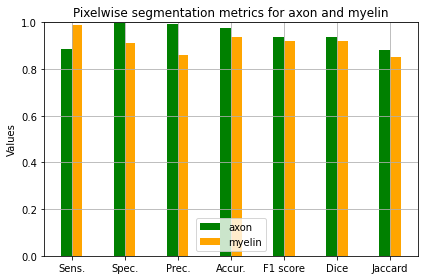

In [14]:
n_groups = 7
fig, ax = plt.subplots()
index = np.arange(n_groups)

ax.bar(index-0.1, axon_metrics_array, width=0.2, color='green',label='axon')
ax.bar(index+0.1, myelin_metrics_array, width=0.2, color='orange',label='myelin')

ax.set_ylabel('Values')
ax.set_title('Pixelwise segmentation metrics for axon and myelin')
ax.set_xticks(index)
ax.set_xticklabels(('Sens.', 'Spec.', 'Prec.', 'Accur.', 'F1 score','Dice','Jaccard'), minor=False, rotation=0)
ax.legend(loc='best')
ax.grid(True)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

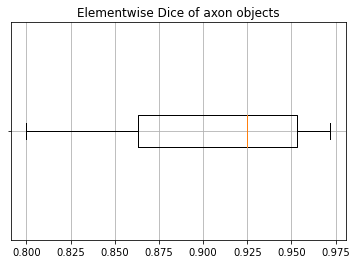

In [16]:
fig, ax = plt.subplots()
ax.boxplot(dice_output, 0, '',vert=False)
ax.set_title('Elementwise Dice of axon objects')
ax.grid(True)

# A way to remove the y labels
ax.set_yticklabels([]);
